In [72]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

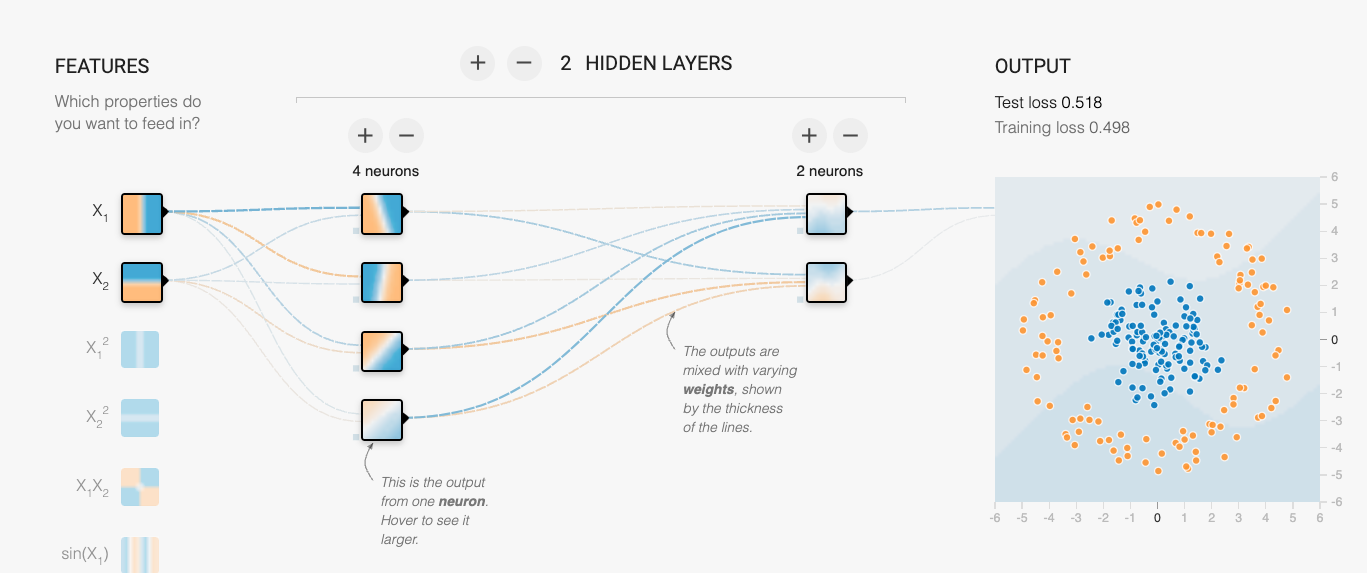

In [73]:
model = Sequential()
model.add(Dense(units=4, activation="sigmoid",input_shape=[2,], name="hidden_1"))
model.add(Dense(units=2, activation="sigmoid", name="hidden_2"))
model.add(Dense(units=1, activation="sigmoid", name="output"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 4)                 12        
                                                                 
 hidden_2 (Dense)            (None, 2)                 10        
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model.layers

In [75]:
model.layers[0].get_weights()

[array([[-0.941406  , -0.682971  ,  0.54057384, -0.9638586 ],
        [-0.5509443 , -0.9960828 ,  0.5949886 ,  0.36918926]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32)]

In [76]:
model.layers[1].get_weights()

[array([[ 0.64659214, -0.6086061 ],
        [-0.32852602,  0.29356527],
        [ 0.03121996, -0.7854202 ],
        [ 0.55392647,  0.10370255]], dtype=float32),
 array([0., 0.], dtype=float32)]

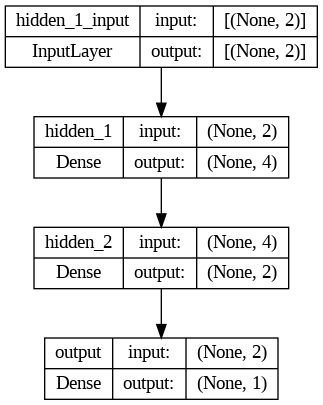

In [77]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [78]:
x = np.ones((4,3),dtype='float')

In [79]:
x

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [80]:
model_1 = Sequential()
model_1.add(Dense(units=1, activation="sigmoid",input_shape=[3,], name="hidden_1"))
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
model_1.layers[0].get_weights()

[array([[-1.1319557],
        [ 0.9546188],
        [ 0.9124268]], dtype=float32),
 array([0.], dtype=float32)]

In [82]:
model_1(x)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.6759212],
       [0.6759212],
       [0.6759212],
       [0.6759212]], dtype=float32)>

In [83]:
model_1.layers[0].get_weights()[0].sum()

0.7350899

In [84]:
# sigmoid
1/(1+np.exp(-0.73165625))

0.6751686199644684

In [85]:
x = np.random.randint(-10,100,(4,3))
x = np.array(x,dtype='float')
model_1(x)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

# In Class Assignment :
- Modify the network which can accept the input having 4 features
- use activation = "relu"
- 1st hidden layer  - 5 neurons
- 2nd hidden layer - 4 neurons
- last hidden layer - 1 neurons

- Display weights, bias, and output by applying example data

In [86]:
model = Sequential(layers= [Dense(units=5, activation="relu",input_shape=[4,], name="hidden_1"),
                            Dense(units=4, activation="relu", name="hidden_2"),
                            Dense(units=1, activation="relu", name="output")])

In [87]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 5)                 25        
                                                                 
 hidden_2 (Dense)            (None, 4)                 24        
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 54 (216.00 Byte)
Trainable params: 54 (216.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
for l in model.layers:
  print(l.get_weights())

[array([[-0.57271177, -0.34391657,  0.45561707,  0.41380203,  0.14673275],
       [-0.3727876 , -0.37353978,  0.6263511 ,  0.6165124 ,  0.25961697],
       [ 0.66747844,  0.29505205,  0.45501792,  0.7767421 , -0.06551528],
       [-0.2959755 ,  0.5254482 , -0.1734221 ,  0.7595477 ,  0.34324825]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
[array([[ 0.7728896 , -0.36511046, -0.78134656,  0.3358196 ],
       [-0.28600967,  0.05379939,  0.01718467, -0.22871655],
       [ 0.40325487,  0.16120046, -0.598035  , -0.21833801],
       [ 0.01328397, -0.2732005 ,  0.48378587, -0.14043307],
       [ 0.7773732 , -0.70483565, -0.4294934 ,  0.4196757 ]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32)]
[array([[-0.55012196],
       [-0.00156283],
       [-0.028952  ],
       [ 0.8670533 ]], dtype=float32), array([0.], dtype=float32)]


In [89]:
x = np.ones((4,4),dtype="float")

In [90]:
model(x)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

# Multi Class Classification

In [91]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

In [92]:
(X_train, y_train), (X_test, y_test) = load_data()

In [93]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

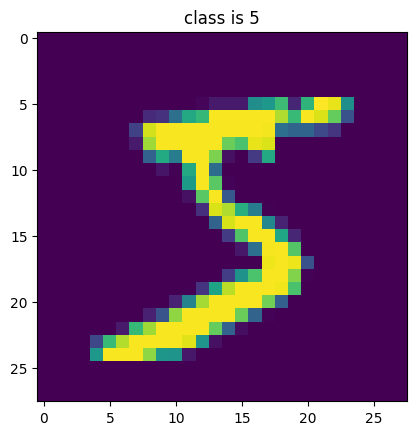

In [94]:
plt.imshow(X_train[0])
plt.title(f"class is {y_train[0]}")
plt.show()

In [95]:
28*28

784

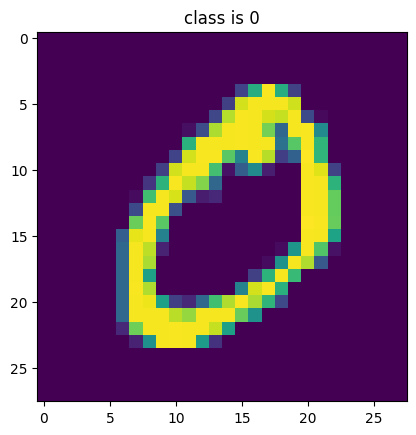

In [96]:
plt.imshow(X_train[1])
plt.title(f"class is {y_train[1]}")
plt.show()

In [97]:
np.max(X_train),np.min(X_train)

(255, 0)

In [98]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [99]:
# Preprocessing steps
# Normalize the input data
X_train = X_train/255
X_test = X_test/255


# One Hot Encoding on target data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [100]:
np.max(X_train),np.min(X_train)

(1.0, 0.0)

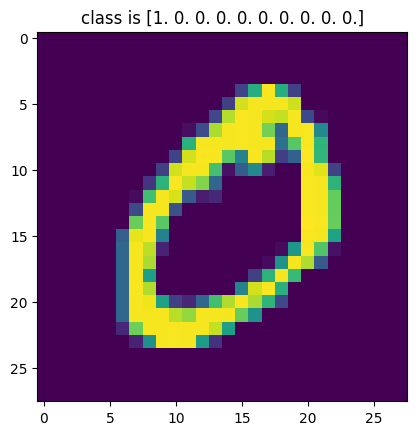

In [101]:
plt.imshow(X_train[1])
plt.title(f"class is {y_train[1]}")
plt.show()

In [102]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [103]:
# converting our data in 2d format (rows X columns)
# flatten
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [104]:
X_train.shape

(60000, 784)

In [105]:
X_test.shape

(10000, 784)

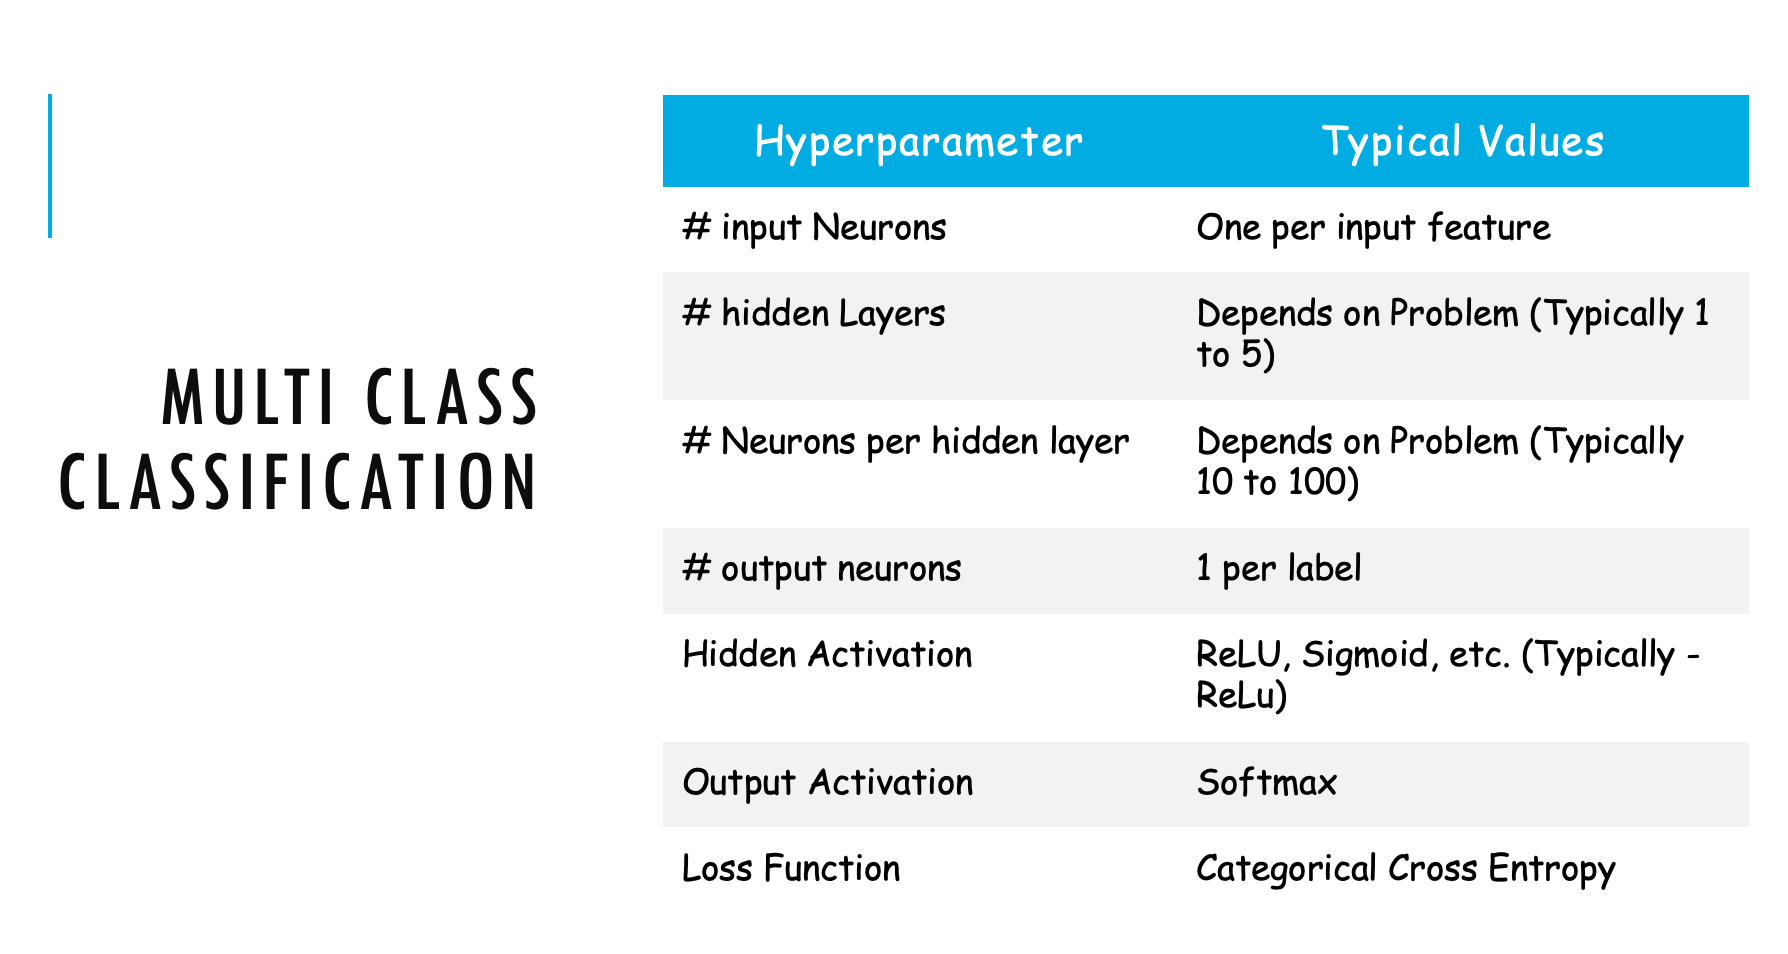

In [ ]:
X_train[0]

In [109]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape = [784,]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax')) # output layer
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
model.compile(optimizer='SGD',
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])

In [111]:
h = model.fit(X_train,y_train,
          batch_size=100,
          validation_data = (X_test,y_test),
          epochs=15)

Epoch 1/15
600/600 [==============================] - 4s 6ms/step - loss: 1.0996 - accuracy: 0.7175 - val_loss: 0.5074 - val_accuracy: 0.8725
Epoch 2/15
600/600 [==============================] - 2s 4ms/step - loss: 0.4312 - accuracy: 0.8849 - val_loss: 0.3514 - val_accuracy: 0.9073
Epoch 3/15
600/600 [==============================] - 2s 3ms/step - loss: 0.3419 - accuracy: 0.9033 - val_loss: 0.3013 - val_accuracy: 0.9163
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 0.3026 - accuracy: 0.9138 - val_loss: 0.2764 - val_accuracy: 0.9207
Epoch 5/15
600/600 [==============================] - 2s 3ms/step - loss: 0.2771 - accuracy: 0.9207 - val_loss: 0.2549 - val_accuracy: 0.9283
Epoch 6/15
600/600 [==============================] - 2s 3ms/step - loss: 0.2573 - accuracy: 0.9264 - val_loss: 0.2396 - val_accuracy: 0.9340
Epoch 7/15
600/600 [==============================] - 4s 6ms/step - loss: 0.2409 - accuracy: 0.9316 - val_loss: 0.2277 - val_accuracy: 0.9362
Epoch 

In [113]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

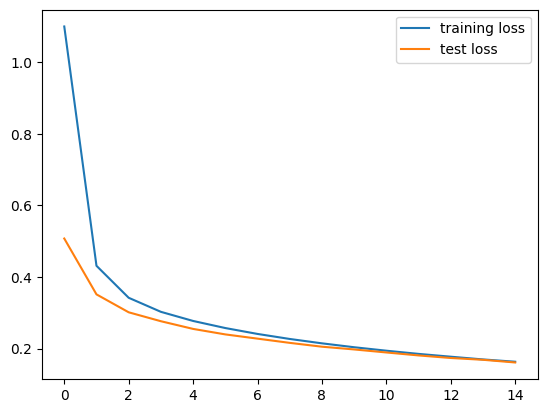

In [114]:
plt.plot(h.history['loss'],label="training loss")
plt.plot(h.history['val_loss'],label="test loss")
plt.legend()
plt.show()

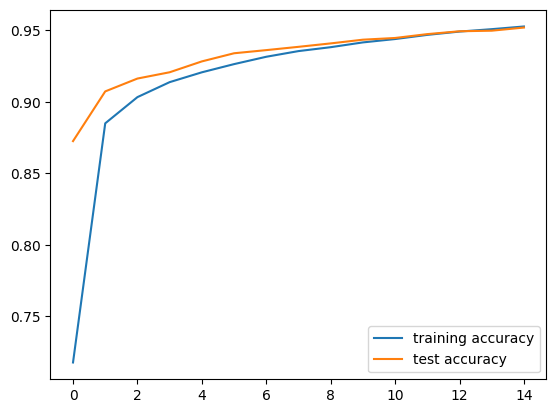

In [115]:
plt.plot(h.history['accuracy'],label="training accuracy")
plt.plot(h.history['val_accuracy'],label="test accuracy")
plt.legend()
plt.show()

In [118]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[6.97581490e-05, 1.48050424e-06, 1.09727657e-03, 6.98023767e-04,
        8.62235595e-07, 1.40727454e-04, 4.81596807e-09, 9.97866273e-01,
        4.52850036e-05, 8.02866998e-05],
       [4.48157407e-05, 7.07218278e-05, 9.96337652e-01, 1.58373883e-03,
        2.79329537e-08, 1.22583227e-03, 4.06129431e-04, 1.01388995e-08,
        3.30959418e-04, 5.04482189e-09],
       [7.52463311e-05, 9.82384205e-01, 6.67155627e-03, 1.16434984e-03,
        6.28420035e-04, 1.24782254e-03, 1.19381701e-03, 4.68201051e-03,
        1.74015784e-03, 2.12541898e-04],
       [9.98673797e-01, 4.61266779e-07, 5.92965051e-04, 5.35810104e-05,
        1.55377265e-07, 1.08371722e-04, 1.60479351e-04, 2.48251366e-04,
        4.75127399e-06, 1.57280272e-04],
       [1.63128323e-04, 5.73252510e-06, 6.24035718e-04, 2.15823748e-05,
        9.64450181e-01, 1.53376619e-04, 2.16667730e-04, 4.47100354e-03,
        1.49441781e-04, 2.97448020e-02]], dtype=float32)

In [120]:
np.argmax(y_pred,axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [121]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1612 - accuracy: 0.9520


[0.16117101907730103, 0.9520000219345093]

In [122]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                  mode='min',
                  verbose=1,
                  patience=3,
                   min_delta=0.05)

In [123]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape = [784,]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax')) # output layer


model.compile(optimizer='SGD',
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# batches = [64,32,128,1024]
# for batch in batches:
#     h = model.fit(X_train,y_train,
#               batch_size=batch,
#               validation_data = (X_test,y_test),
#               epochs=15,
              callbacks=[es])
h = model.fit(X_train,y_train,
          batch_size=100,
          validation_data = (X_test,y_test),
          epochs=15,
          callbacks=[es])

Epoch 1/15
600/600 [==============================] - 4s 6ms/step - loss: 1.0782 - accuracy: 0.7281 - val_loss: 0.4950 - val_accuracy: 0.8727
Epoch 2/15
600/600 [==============================] - 2s 4ms/step - loss: 0.4294 - accuracy: 0.8854 - val_loss: 0.3552 - val_accuracy: 0.9031
Epoch 3/15
600/600 [==============================] - 2s 3ms/step - loss: 0.3472 - accuracy: 0.9035 - val_loss: 0.3103 - val_accuracy: 0.9139
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 0.3101 - accuracy: 0.9126 - val_loss: 0.2842 - val_accuracy: 0.9195
Epoch 5/15
600/600 [==============================] - 2s 3ms/step - loss: 0.2857 - accuracy: 0.9193 - val_loss: 0.2657 - val_accuracy: 0.9254
Epoch 6/15
600/600 [==============================] - 2s 3ms/step - loss: 0.2670 - accuracy: 0.9243 - val_loss: 0.2504 - val_accuracy: 0.9288
Epoch 7/15
600/600 [==============================] - 3s 5ms/step - loss: 0.2514 - accuracy: 0.9281 - val_loss: 0.2365 - val_accuracy: 0.9331
Epoch 

In [125]:
.2842-0.05

0.23420000000000002

# Assignments
- Multi class - https://www.tensorflow.org/tutorials/keras/classification
- Regression - https://www.tensorflow.org/tutorials/keras/regression
- Text classification - https://www.tensorflow.org/tutorials/keras/text_classification
- Breast cancer dataset
- kaggle.com

In [ ]:
# Drop out, regularization - Conv2D